In [ ]:
# Import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Load the dataset
df = pd.read_csv('../data/Customer-Churn.csv')

# Display the first few rows
print(df.head())



In [ ]:

# Check for missing values
print(df.isnull().sum())

# Convert TotalCharges to numeric (it might contain non-numeric values)
df["TotalCharges"] = pd.to_numeric(df["TotalCharges"], errors="coerce")

# Fill missing values if necessary
df.fillna({"TotalCharges": df["TotalCharges"].median()}, inplace=True)

# Convert categorical variables (e.g., 'Churn') to numerical for analysis
df["Churn"] = df["Churn"].map({"Yes": 1, "No": 0})

# Check data types
print(df.dtypes)


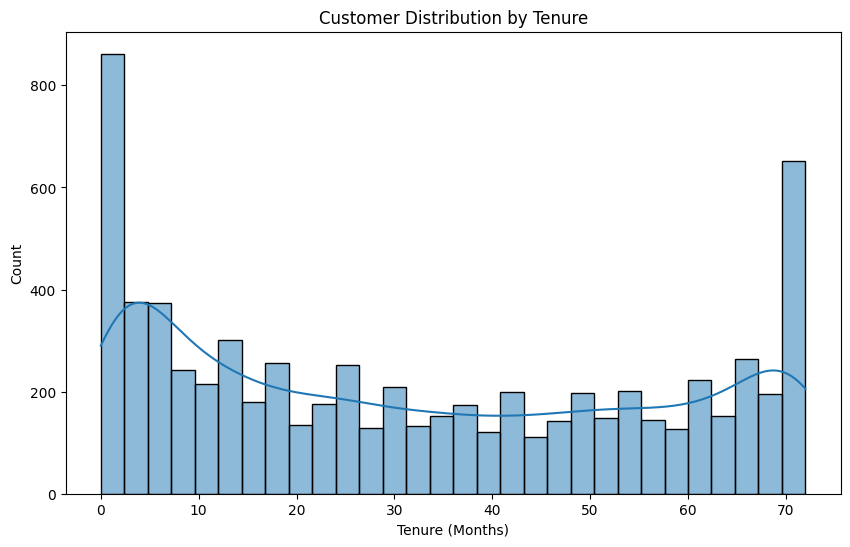

In [23]:


# 1. Customer Distribution Over Tenure
plt.figure(figsize=(10, 6))
sns.histplot(df['tenure'], bins=30, kde=True)
plt.title("Customer Distribution by Tenure")
plt.xlabel("Tenure (Months)")
plt.ylabel("Count")
plt.show()



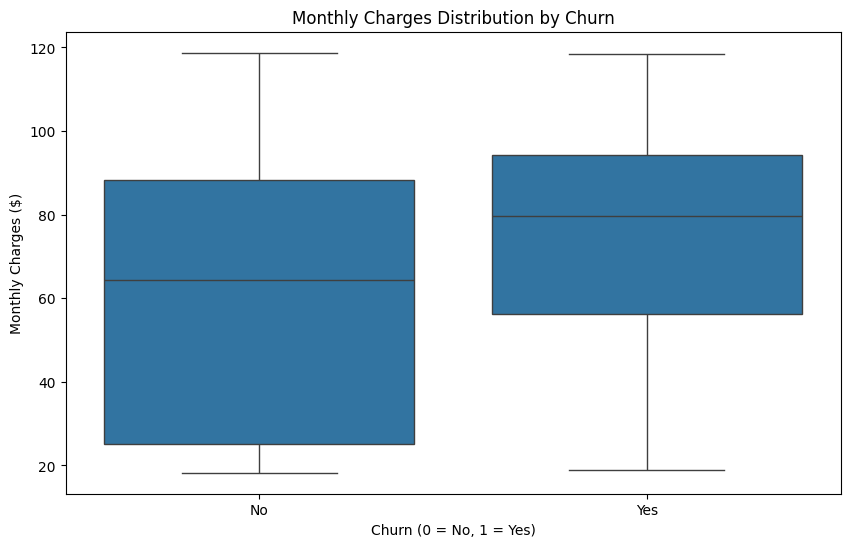

In [24]:
# 2. Churn Rate by Monthly Charges
plt.figure(figsize=(10, 6))
sns.boxplot(data=df, x="Churn", y="MonthlyCharges")
plt.title("Monthly Charges Distribution by Churn")
plt.xlabel("Churn (0 = No, 1 = Yes)")
plt.ylabel("Monthly Charges ($)")
plt.show()




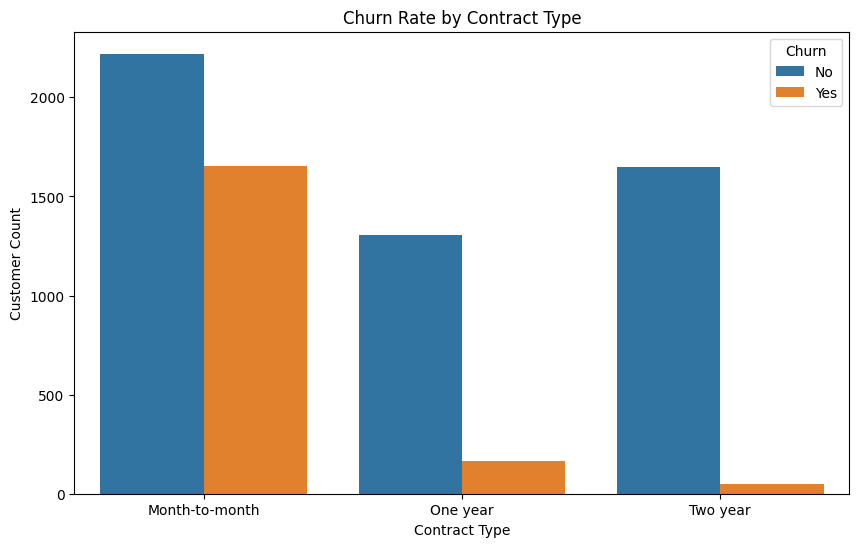

In [25]:
# 3. Churn by Contract Type
plt.figure(figsize=(10, 6))
sns.countplot(data=df, x="Contract", hue="Churn")
plt.title("Churn Rate by Contract Type")
plt.xlabel("Contract Type")
plt.ylabel("Customer Count")
plt.show()



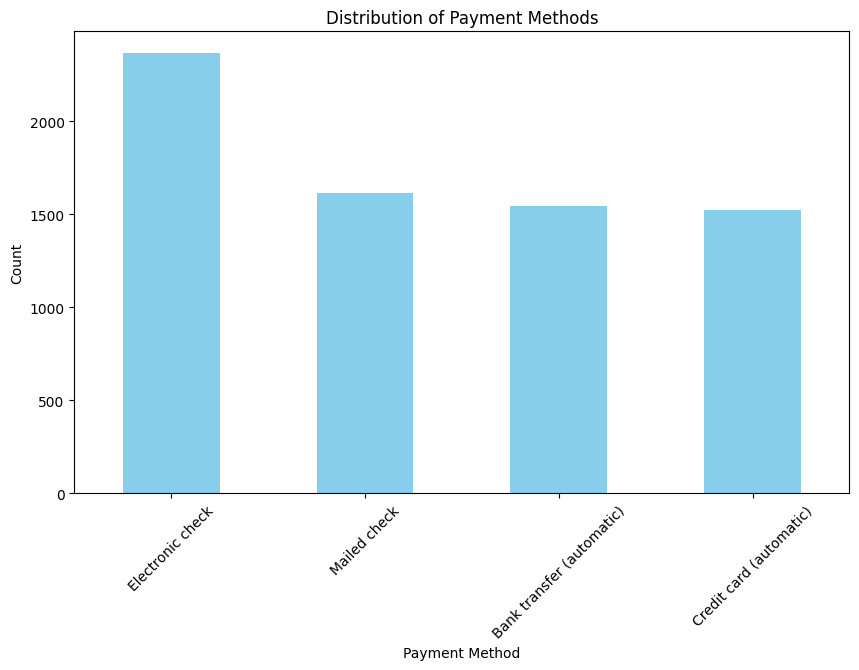

In [27]:
# 4. Payment Method Analysis
plt.figure(figsize=(10, 6))
df["PaymentMethod"].value_counts().plot(kind="bar", color="skyblue")
plt.title("Distribution of Payment Methods")
plt.xlabel("Payment Method")
plt.ylabel("Count")
plt.xticks(rotation=45)
plt.show()



C:\Users\saaji\AppData\Local\Temp\ipykernel_32552\3397287726.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=top_customers, x="customerID", y="TotalCharges", palette="Blues_r")


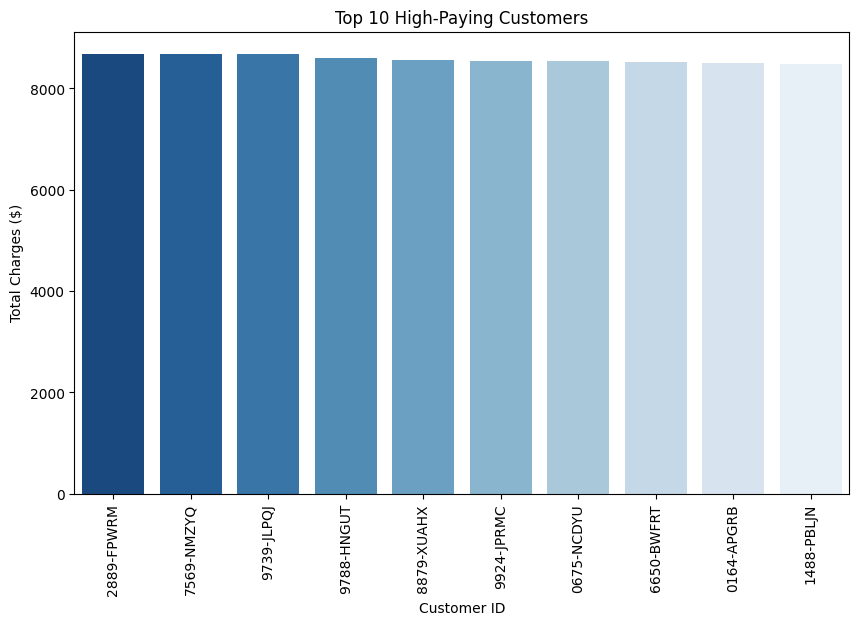

In [28]:
# 5. Top Revenue-Generating Customers
top_customers = df.nlargest(10, "TotalCharges")[["customerID", "TotalCharges"]]
plt.figure(figsize=(10, 6))
sns.barplot(data=top_customers, x="customerID", y="TotalCharges", palette="Blues_r")
plt.xticks(rotation=90)
plt.title("Top 10 High-Paying Customers")
plt.xlabel("Customer ID")
plt.ylabel("Total Charges ($)")
plt.show()